<a href="https://colab.research.google.com/github/ashishsubedi/stock-analysis-pred/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

In [388]:
# from google.colab import files

# uploaded = files.upload()

In [389]:
file_names = ['nic.csv']
df_list = []
closed_df_list = []

In [390]:
for f in file_names:
    name = f.split(sep='.')[0]
    df = pd.read_csv(f,index_col=0)
    # df = df[::-1]
    df.reset_index(drop=True,inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df_list.append((name,df))

In [391]:
for name,df in df_list:
    print(name)
    display(df.head())

nic


,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,2019-01-01,30,7155,2707400,383,377,380
1,2019-01-02,43,19408,7370888,382,378,382
2,2019-01-03,44,8316,3179485,385,381,383
3,2019-01-06,48,9575,3631962,383,377,377
4,2019-01-07,45,17398,6606274,383,377,379


In [392]:
df.tail()

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
435,2021-01-10,981,194033,179425191,935,910,927
436,2021-01-11,707,176512,163009521,963,912,915
437,2021-01-12,564,135414,123833420,950,907,918
438,2021-01-13,595,174132,159386980,936,907,912
439,2021-01-17,989,254035,229024879,925,896,901


In [393]:
for name,df in df_list:
    
    closed_price_df = df[['Date','Close Price']]
    closed_df_list.append((name,closed_price_df))
    print(name)
    display(closed_price_df.head())

nic


,Date,Close Price
0,2019-01-01,380
1,2019-01-02,382
2,2019-01-03,383
3,2019-01-06,377
4,2019-01-07,379


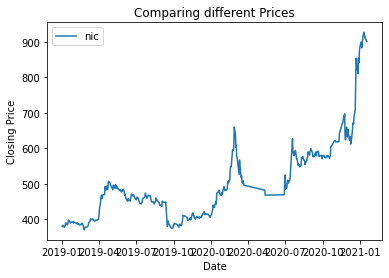

In [394]:
for name,df in closed_df_list:
    
    plt.plot(df['Date'],df['Close Price'],label=name)
    
plt.title('Comparing different Prices')
plt.xlabel("Date")
plt.legend()
plt.ylabel("Closing Price")

plt.show()

In [395]:
fig = go.Figure()
for name,df in closed_df_list:
    fig = fig.add_trace(go.Scatter(x=df['Date'],y=df['Close Price'],name=name))
fig.show()

In [396]:
name,df = df_list[0]

In [397]:
df.head()

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,2019-01-01,30,7155,2707400,383,377,380
1,2019-01-02,43,19408,7370888,382,378,382
2,2019-01-03,44,8316,3179485,385,381,383
3,2019-01-06,48,9575,3631962,383,377,377
4,2019-01-07,45,17398,6606274,383,377,379


In [398]:
df.describe()

,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
count,440.000000,440.000000,4.400000e+02,440.000000,440.000000,440.000000
mean,321.952273,80094.565909,4.772807e+07,508.490909,494.195455,500.438636
std,393.480781,93826.650236,6.921361e+07,118.447801,110.842530,114.206187
min,2.000000,60.000000,2.813000e+04,377.000000,368.000000,370.000000
25%,88.000000,21959.500000,9.051618e+06,413.750000,405.750000,408.000000
50%,171.000000,42403.000000,2.010977e+07,475.000000,465.000000,469.000000
75%,388.000000,100493.000000,5.448131e+07,581.250000,570.000000,574.000000
max,2871.000000,674434.000000,4.797399e+08,963.000000,912.000000,927.000000


In [399]:
df_avg = df[['Date','Total Transactions', 'Total Traded Shares', 'Total Traded Amount','Close Price']]
df_avg.head()

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Close Price
0,2019-01-01,30,7155,2707400,380
1,2019-01-02,43,19408,7370888,382
2,2019-01-03,44,8316,3179485,383
3,2019-01-06,48,9575,3631962,377
4,2019-01-07,45,17398,6606274,379


In [400]:
roll = 10
avg_array = []
for i in range(0,len(df)-roll-1):
    del_alpha = 1/(roll+1)
    alpha = del_alpha
    total_weight = 0
    avg_transactions = 0
    avg_total_traded_shares = 0
    avg_total_traded_amt = 0
    avg_max_amt = 0
    avg_min_amt = 0
    for j in range(roll):
        avg_transactions += alpha*df.iloc[i+j,1] 
        avg_total_traded_shares += alpha*df.iloc[i+j,2] 
        avg_total_traded_amt += alpha*df.iloc[i+j,3] 
        avg_max_amt += alpha*df.iloc[i+j,4] 
        avg_min_amt += alpha*df.iloc[i+j,5] 
        # print(alpha,del_alpha)
        alpha += del_alpha
        total_weight += alpha
        
    # break
    avg_array.append([df.iloc[i+roll-1,0],avg_transactions/total_weight,avg_total_traded_shares/total_weight,avg_total_traded_amt/total_weight,avg_max_amt/total_weight,avg_min_amt/total_weight,df.iloc[i+roll-1,6]])
    # avg_array.append([df.iloc[i+roll-1,0],avg_transactions,avg_total_traded_shares,avg_total_traded_amt,df.iloc[i+roll-1,4],df.iloc[i+roll-1,5],df.iloc[i+roll-1,6]])

df_avg = pd.DataFrame(avg_array,columns=['Date','Total Transactions', 'Total Traded Shares', 'Total Traded Amount','Max. Price','Min. Price','Close Price'])
df_avg.head()
    


,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,2019-01-14,55.738462,25224.861538,9.710526e+06,328.384615,322.830769,386
1,2019-01-15,55.200000,23940.323077,9.233672e+06,329.246154,323.707692,390
2,2019-01-16,84.584615,32065.107692,1.251019e+07,331.353846,325.061538,398
3,2019-01-17,93.369231,31559.261538,1.235030e+07,333.169231,327.000000,396
4,2019-01-20,86.076923,27530.461538,1.078737e+07,334.123077,328.261538,392


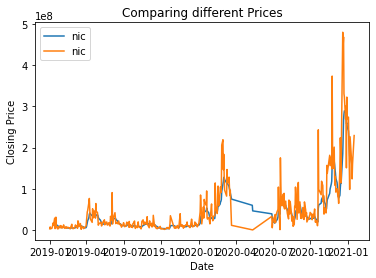

In [401]:
plt.plot(df_avg['Date'],df_avg['Total Traded Amount'],label=name)
plt.plot(df['Date'],df['Total Traded Amount'],label=name)
    
plt.title('Comparing different Prices')
plt.xlabel("Date")
plt.legend()
plt.ylabel("Closing Price")

plt.show()

In [402]:
X = df_avg[['Total Transactions', 'Total Traded Shares', 'Total Traded Amount','Max. Price','Min. Price']]
y = df_avg['Close Price']

In [403]:
X.head()

,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price
0,55.738462,25224.861538,9.710526e+06,328.384615,322.830769
1,55.200000,23940.323077,9.233672e+06,329.246154,323.707692
2,84.584615,32065.107692,1.251019e+07,331.353846,325.061538
3,93.369231,31559.261538,1.235030e+07,333.169231,327.000000
4,86.076923,27530.461538,1.078737e+07,334.123077,328.261538


In [404]:
y.head()

0    386
1    390
2    398
3    396
4    392
Name: Close Price, dtype: int64

In [405]:
from sklearn.preprocessing import StandardScaler

In [406]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error as MSE

In [407]:
len(X)

429

In [408]:
test_size = 0.2
len_train_size = int(len(X) - (len(X)*test_size))
len_train_size

343

In [409]:
X_train = X[:len_train_size]
y_train = y[:len_train_size]
X_test = X[len_train_size:]
y_test = y[len_train_size:]

In [410]:
X_train

,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price
0,55.738462,25224.861538,9.710526e+06,328.384615,322.830769
1,55.200000,23940.323077,9.233672e+06,329.246154,323.707692
2,84.584615,32065.107692,1.251019e+07,331.353846,325.061538
3,93.369231,31559.261538,1.235030e+07,333.169231,327.000000
4,86.076923,27530.461538,1.078737e+07,334.123077,328.261538
...,...,...,...,...,...
338,334.446154,74896.123077,4.360570e+07,494.153846,483.769231
339,360.907692,89709.446154,5.243134e+07,497.476923,485.907692
340,413.015385,106007.230769,6.240624e+07,500.938462,489.446154
341,405.384615,100956.861538,5.956956e+07,504.953846,492.523077


In [411]:
y_train

0      386
1      390
2      398
3      396
4      392
      ... 
338    581
339    589
340    599
341    595
342    588
Name: Close Price, Length: 343, dtype: int64

In [412]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled[:,3] = X_train['Max. Price']
# X_train_scaled[:,4] = X_train['Min. Price']
X_train_scaled

array([[-0.86149288, -0.54754897, -0.58831058, -1.20174987, -1.2157427 ],
       [-0.86518046, -0.57831553, -0.60775937, -1.18584449, -1.19810065],
       [-0.66394413, -0.38371516, -0.47412464, -1.14693314, -1.17086381],
       ...,
       [ 1.58526698,  1.38730594,  1.5609164 ,  1.98386886,  2.13624576],
       [ 1.53300875,  1.26634227,  1.44522067,  2.05799925,  2.19814767],
       [ 1.62656784,  1.30990038,  1.49350616,  2.15541966,  2.21702776]])

In [413]:
X_train_scaled

array([[-0.86149288, -0.54754897, -0.58831058, -1.20174987, -1.2157427 ],
       [-0.86518046, -0.57831553, -0.60775937, -1.18584449, -1.19810065],
       [-0.66394413, -0.38371516, -0.47412464, -1.14693314, -1.17086381],
       ...,
       [ 1.58526698,  1.38730594,  1.5609164 ,  1.98386886,  2.13624576],
       [ 1.53300875,  1.26634227,  1.44522067,  2.05799925,  2.19814767],
       [ 1.62656784,  1.30990038,  1.49350616,  2.15541966,  2.21702776]])

In [414]:
scaler.mean_

array([1.81534021e+02, 4.80856471e+04, 2.41349890e+07, 3.93479211e+02,
       3.83261000e+02])

In [415]:
model = RandomForestRegressor(n_estimators=200,max_depth=100,bootstrap=True)
model.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [416]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [417]:

rmse = MSE(y_pred,y_test)**(1/2)
rmse


126.98159726584812

In [418]:
df_avg[df_avg['Date'].index>=len_train_size]

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
343,2020-09-07,407.630769,96657.507692,5.707282e+07,509.661538,493.046154,577
344,2020-09-08,375.323077,86171.676923,5.081135e+07,507.230769,491.415385,579
345,2020-09-09,356.353846,78551.984615,4.618986e+07,504.753846,489.907692,577
346,2020-09-10,323.692308,69122.107692,4.055418e+07,502.876923,489.200000,576
347,2020-09-13,313.584615,68745.784615,4.019572e+07,501.369231,488.200000,587
...,...,...,...,...,...,...,...
424,2021-01-06,862.738462,204370.323077,1.793202e+08,755.123077,733.000000,892
425,2021-01-07,860.492308,200301.353846,1.774677e+08,760.446154,739.107692,908
426,2021-01-10,838.123077,189781.815385,1.699183e+08,767.876923,747.107692,927
427,2021-01-11,781.015385,178643.769231,1.612144e+08,778.092308,753.800000,915


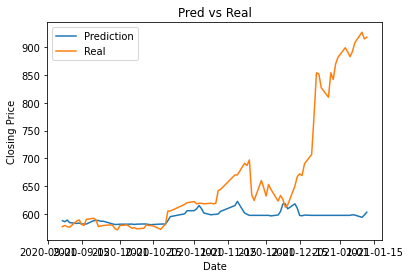

In [419]:
def plot_trend():
    plt.plot(df_avg[df_avg['Date'].index>=len_train_size]['Date'],y_pred,label='Prediction')
    plt.plot(df_avg[df_avg['Date'].index>=len_train_size]['Date'],y_test,label='Real')
    # plt.plot(df['Date'],df['Close Price'],label=name)
        
    plt.title('Pred vs Real')
    plt.xlabel("Date")
    plt.legend()
    plt.ylabel("Closing Price")

    plt.show()
plot_trend()

In [420]:
model.feature_importances_

array([0.01155454, 0.00975522, 0.01091041, 0.64108084, 0.32669899])

In [421]:
svr = SVR()
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [422]:
X_test_scaled = scaler.transform(X_test)
# X_test_scaled[:,3] = X_test['Max. Price']
# X_test_scaled[:,4] = X_test['Min. Price']
y_pred = svr.predict(X_test)

In [423]:

rmse = MSE(y_pred,y_test)**(1/2)
rmse


209.2794224507677

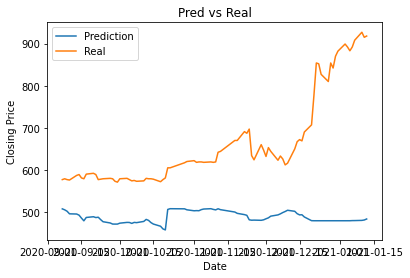

In [424]:
plot_trend()

In [425]:
from sklearn.ensemble import GradientBoostingRegressor

In [426]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [427]:
X_test_scaled = scaler.transform(X_test)
# X_test_scaled[:,3] = X_test['Max. Price']
# X_test_scaled[:,4] = X_test['Min. Price']
y_pred = gb.predict(X_test)

In [428]:

rmse = MSE(y_pred,y_test)**(1/2)
rmse


122.27291757915155

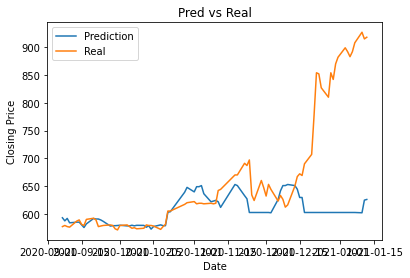

In [429]:
plot_trend()


In [430]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [431]:
roll=10

In [486]:
lstm_model = tf.keras.models.Sequential([
      LSTM(256,return_sequences=True, input_shape=(roll,1),activation='relu'),
      Dropout(0.2),
      LSTM(128,activation='relu'),
      Dropout(0.2),

      Dense(64,activation='relu'),
      Dropout(0.2),

      Dense(1,activation='relu')

])

In [487]:
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 10, 256)           264192    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [488]:
lstm_model.compile(loss='mse',optimizer='adam')

In [489]:
def split_sequence(sequence, roll):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + roll
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x = sequence[i:end_ix]
    seq_y = sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [490]:
df

,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,2019-01-01,30,7155,2707400,383,377,380
1,2019-01-02,43,19408,7370888,382,378,382
2,2019-01-03,44,8316,3179485,385,381,383
3,2019-01-06,48,9575,3631962,383,377,377
4,2019-01-07,45,17398,6606274,383,377,379
...,...,...,...,...,...,...,...
435,2021-01-10,981,194033,179425191,935,910,927
436,2021-01-11,707,176512,163009521,963,912,915
437,2021-01-12,564,135414,123833420,950,907,918
438,2021-01-13,595,174132,159386980,936,907,912


In [491]:
data = df['Close Price']

data.head()

0    380
1    382
2    383
3    377
4    379
Name: Close Price, dtype: int64

In [492]:
train_length = int(0.7* len(data))
train_data = data[:train_length]
test_data = data[train_length:]

In [493]:
data

0      380
1      382
2      383
3      377
4      379
      ... 
435    927
436    915
437    918
438    912
439    901
Name: Close Price, Length: 440, dtype: int64

In [494]:
train_data

0      380
1      382
2      383
3      377
4      379
      ... 
303    468
304    469
305    506
306    525
307    485
Name: Close Price, Length: 308, dtype: int64

In [495]:
new_X_train, new_y_train = split_sequence(np.array(train_data),roll)
new_X_train,new_y_train

(array([[380, 382, 383, ..., 390, 384, 386],
        [382, 383, 377, ..., 384, 386, 390],
        [383, 377, 379, ..., 386, 390, 398],
        ...,
        [550, 518, 522, ..., 482, 468, 469],
        [518, 522, 508, ..., 468, 469, 506],
        [522, 508, 502, ..., 469, 506, 525]]),
 array([390, 398, 396, 392, 389, 390, 392, 392, 391, 393, 390, 392, 391,
        390, 389, 389, 387, 390, 385, 386, 386, 384, 384, 387, 385, 389,
        387, 384, 370, 374, 376, 378, 378, 381, 385, 391, 394, 400, 401,
        399, 399, 401, 398, 399, 395, 396, 398, 398, 398, 398, 400, 410,
        426, 436, 440, 468, 466, 458, 466, 469, 470, 492, 487, 482, 494,
        484, 490, 506, 507, 502, 496, 495, 491, 483, 496, 494, 493, 488,
        498, 487, 493, 491, 490, 484, 483, 482, 484, 484, 477, 480, 480,
        480, 485, 478, 468, 470, 460, 451, 457, 458, 454, 451, 454, 461,
        466, 471, 466, 467, 469, 467, 463, 456, 456, 455, 462, 462, 458,
        452, 449, 445, 445, 443, 446, 448, 456, 459, 461, 

In [496]:
scaler = StandardScaler()
new_X_train = scaler.fit_transform(new_X_train)
new_X_train

array([[-1.17480692, -1.14439939, -1.13301617, ..., -1.03809283,
        -1.16015196, -1.12892201],
       [-1.1366039 , -1.1253047 , -1.24758652, ..., -1.15330045,
        -1.12177002, -1.05228903],
       [-1.11750239, -1.23987279, -1.2093964 , ..., -1.11489791,
        -1.04500615, -0.89902308],
       ...,
       [ 2.07244965,  1.45247734,  1.52119691, ...,  0.72842403,
         0.45188933,  0.46121221],
       [ 1.46120136,  1.52885607,  1.2538661 , ...,  0.45960624,
         0.4710803 ,  1.17006723],
       [ 1.53760739,  1.26153052,  1.13929575, ...,  0.47880751,
         1.18114611,  1.53407385]])

In [497]:
scaler.mean_,scaler.var_,len(scaler.mean_)

(array([441.5033557 , 441.93288591, 442.33557047, 442.75838926,
        443.15771812, 443.5033557 , 443.79194631, 444.06375839,
        444.45302013, 444.9261745 ]),
 array([2740.7197874 , 2742.68005946, 2742.57195622, 2745.49195982,
        2740.3341854 , 2731.46475384, 2720.7016801 , 2712.31472681,
        2715.22765866, 2724.51132832]),
 10)

In [498]:
new_X_train.shape

(298, 10)

In [499]:
new_X_train = new_X_train.reshape((new_X_train.shape[0],new_X_train.shape[1],1))

In [500]:
history = lstm_model.fit(new_X_train,new_y_train,epochs=100)

Epoch 1/100
10/10 [==============================] - 3s 63ms/step - loss: 204190.0483
Epoch 2/100
10/10 [==============================] - 1s 51ms/step - loss: 205385.1477
Epoch 3/100
10/10 [==============================] - 1s 52ms/step - loss: 140205.6023
Epoch 4/100
10/10 [==============================] - 1s 52ms/step - loss: 131088.1747
Epoch 5/100
10/10 [==============================] - 1s 57ms/step - loss: 125193.8068
Epoch 6/100
10/10 [==============================] - 1s 55ms/step - loss: 76337.0618
Epoch 7/100
10/10 [==============================] - 1s 51ms/step - loss: 30928.1994
Epoch 8/100
10/10 [==============================] - 0s 49ms/step - loss: 16139.9956
Epoch 9/100
10/10 [==============================] - 1s 55ms/step - loss: 9054.8896
Epoch 10/100
10/10 [==============================] - 1s 52ms/step - loss: 7011.7785
Epoch 11/100
10/10 [==============================] - 1s 54ms/step - loss: 5841.9390
Epoch 12/100
10/10 [==============================] - 1s 52ms

In [501]:
def plot_history_loss(history):
  plt.plot(history.history['loss'])
  # plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

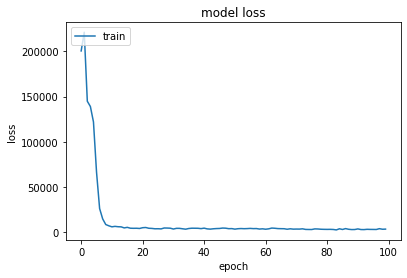

In [502]:
plot_history_loss(history)

In [503]:
def plot_data(y_pred,y_test,roll=roll):
    plt.plot(df[(df['Date'].index>=train_length ) & (data.index<len(df)-roll)]['Date'],y_pred,label='Prediction')
    plt.plot(df[(df['Date'].index>=train_length )]['Date'],y_test,label='Real')
    # plt.plot(df['Date'],df['Close Price'],label=name)
        
    plt.title('Pred vs Real')
    plt.xlabel("Date")
    plt.legend()
    plt.ylabel("Closing Price")

    plt.show()

In [504]:
df[(df['Date'].index>=train_length ) & (df.index<len(df)-roll)]['Date']

308   2020-07-05
309   2020-07-06
310   2020-07-07
311   2020-07-08
312   2020-07-09
         ...    
425   2020-12-27
426   2020-12-28
427   2020-12-29
428   2020-12-30
429   2020-12-31
Name: Date, Length: 122, dtype: datetime64[ns]

In [505]:
new_X_test, new_y_test = split_sequence(np.array(test_data),roll)
new_X_test = scaler.transform(new_X_test)
new_X_test = new_X_test.reshape((new_X_test.shape[0],new_X_test.shape[1],1))

In [506]:
y_pred = lstm_model.predict(new_X_test)
y_pred.shape

(122, 1)

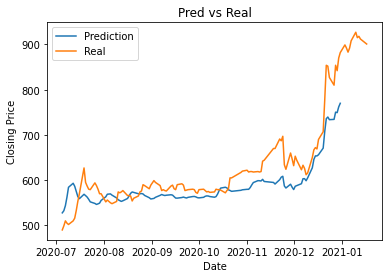

In [507]:
plot_data(y_pred,test_data)

In [508]:
y_pred,len(y_pred)

(array([[527.6934 ],
        [532.42194],
        [543.7214 ],
        [562.2732 ],
        [584.2176 ],
        [593.1343 ],
        [586.46265],
        [575.06744],
        [563.75616],
        [559.05597],
        [568.7831 ],
        [565.8208 ],
        [562.58484],
        [557.6922 ],
        [552.02747],
        [548.53235],
        [546.36847],
        [547.6057 ],
        [549.2188 ],
        [555.1825 ],
        [563.2148 ],
        [568.87555],
        [569.672  ],
        [566.8942 ],
        [560.643  ],
        [556.63794],
        [554.79785],
        [553.0494 ],
        [554.41223],
        [559.43036],
        [565.0479 ],
        [570.8424 ],
        [573.8862 ],
        [572.8843 ],
        [569.98846],
        [569.8409 ],
        [570.46576],
        [569.467  ],
        [566.24   ],
        [561.1914 ],
        [558.3942 ],
        [559.64343],
        [562.0629 ],
        [566.40027],
        [568.2873 ],
        [566.9469 ],
        [566.0592 ],
        [566.

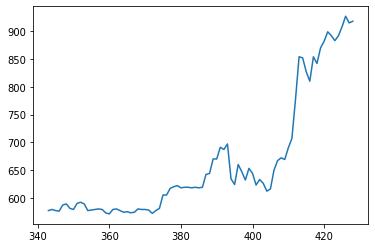

In [509]:
plt.plot(y_test)

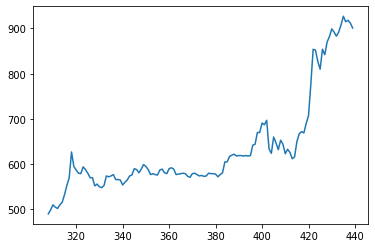

In [510]:
plt.plot(test_data)

In [511]:
lstm_model.evaluate(new_X_test,y_pred)

4/4 [==============================] - 0s 8ms/step - loss: 0.0000e+00


0.0

In [516]:

prices_nic = [875.00,
893.00,
900.00,
907.00,
885.00,
887.00,
889.00,
900.00,
906.00,
901.00,
912.00,
918.00,
915.00,
927.00,
908.00,
892.00,
883.00,
892.00,
899.00,
882.00]
prices_nic = prices_nic[::-1]

In [517]:
prices_nic

[882.0,
 899.0,
 892.0,
 883.0,
 892.0,
 908.0,
 927.0,
 915.0,
 918.0,
 912.0,
 901.0,
 906.0,
 900.0,
 889.0,
 887.0,
 885.0,
 907.0,
 900.0,
 893.0,
 875.0]

In [518]:
valX,valY = split_sequence(prices_nic,roll)
valX.shape,valX

((10, 10), array([[882., 899., 892., 883., 892., 908., 927., 915., 918., 912.],
        [899., 892., 883., 892., 908., 927., 915., 918., 912., 901.],
        [892., 883., 892., 908., 927., 915., 918., 912., 901., 906.],
        [883., 892., 908., 927., 915., 918., 912., 901., 906., 900.],
        [892., 908., 927., 915., 918., 912., 901., 906., 900., 889.],
        [908., 927., 915., 918., 912., 901., 906., 900., 889., 887.],
        [927., 915., 918., 912., 901., 906., 900., 889., 887., 885.],
        [915., 918., 912., 901., 906., 900., 889., 887., 885., 907.],
        [918., 912., 901., 906., 900., 889., 887., 885., 907., 900.],
        [912., 901., 906., 900., 889., 887., 885., 907., 900., 893.]]))

In [519]:
valY

array([901., 906., 900., 889., 887., 885., 907., 900., 893., 875.])

In [520]:

valX = scaler.transform(valX)
valX = valX.reshape((valX.shape[0],valX.shape[1],1))

In [522]:
yhat = lstm_model.predict(valX)
yhat

array([[769.95935],
       [777.6843 ],
       [775.97485],
       [772.79266],
       [776.53906],
       [781.4701 ],
       [784.84326],
       [779.4056 ],
       [778.4907 ],
       [774.8883 ]], dtype=float32)

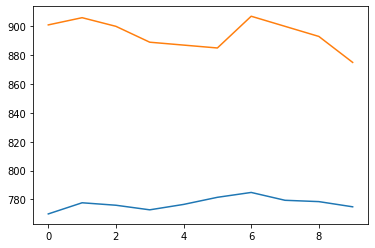

In [524]:
plt.plot(yhat)
plt.plot(valY)